<img src="http://escolar.itam.mx/centro_tesis/img/logo-ITAM.png" style="width:250px">
# Machine Learning

## Regularización
Tarea 5 : Gustavo Augusto Mondragón Sánchez : 136894

### Introducción:
#### Regularización
En modelos estadísticos, la regularización se refiere al proceso en el que se introduce información adicional para solucionar un problema mal definido o para impedir el sobreentrenamiento. Es decir, ayuda a evitar que nuestro modelo se aprenda de memoria los datos.

Pero ¿cómo surge un problema de sobreentrenamiento? intentemos con un ejemplo:

Cuando uno trata de modelar un problema como, por ejemplo, predecir el número de glóbulos rojos en la sangre, lo primero que intentará será usar un modelo de regresión lineal, con el peso como variable independiente y el número de glóbulos rojos como la dependiente. Lo más probable es que el modelo falle ya que es demasiado simple.
Puedes pensar entonces, "tengo otras variables que pueden ayudar como la edad, enfermedades, tipo de sangre, estatura".
Con esta adición de variables e información, el modelo se volverá más complejo. En el modelo mides la exactitud con respecto a una métrica $L(X,y)$ donde $X$ es la matriz por tupla de información y $Y$ es el vector de observaciones (en nuestro caso, el número de glóbulos rojos).
Parece que el modelo es bueno... pero no tanto... Así que decides agregar más información como domicilio, nacionalidad, escolaridad, comida favorita, hora a la que despierta, nombre de sus padres, etc.
El modelo ahora se comporta extraordinariamente bien... pero probablemente está sobreentrenado. Lo más seguro es que tenga poco poder de predicción para información nueva y poca capacidad de generalización. Se aprendió toda la información, incluso el ruido de fondo.

Una de las formas de atacar este problema es con las técnicas de regularización.

Puedes penalizar la métrica de ajuste agregando un múltiplo de $L_1(LASSO)$ O una norma de $L_2(Ridge)$ de los pesos del vector w (parámetros de la regresión). Se consigue la siguiente ecuación:
$$L(X,y) + λN(w) ~~~~~ (N es L1, L2 o cualquier otra norma indistintamente)$$ 

Esto te permitirá evitar el sobreenetrenamiento. 
Para la siguiente etapa de encontrar el $λ$ adecuado se puede hacer cross-validation al variar $λ$ con tu set de validación y buscar el que minimice la métrica asignada.





[Wikipedia, Ridge](https://en.wikipedia.org/wiki/Tikhonov_regularization)
[Wikipedia, Regularización](https://en.wikipedia.org/wiki/Regularization_(mathematics))
[Quora](https://www.quora.com/What-is-regularization-in-machine-learning)

### Objetivos:
* Implementar el algoritmo iterativo incremental regularizado para calcular una regresión lineal.
* Escalar los datos usando StandardScaler
* Comparar el error y los pesos resultantes para una lambda=0 y una lambda=0.001
* Programar el minibatch para regresión lineal iterativa.

In [1]:
#Librerías necesarias:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Estructura de los datos: 

* Una variable dependiente continua Y
* 36 variables independientes continuas $X_i, ~~~ i=1,...,36$

In [2]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLinPoli.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
dataNl.describe()

,X,X2,X3,X4,X5,y
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,48.052380,3113.669342,1.542203,-0.011250,628.000000,3113.490528
std,28.379936,2891.956247,0.452374,0.717016,297.191016,2892.963581
min,0.006314,0.000040,-2.199666,-0.999993,114.000000,0.000040
25%,23.174764,537.069692,1.365015,-0.731530,371.000000,522.757565
50%,47.655827,2271.077831,1.678116,-0.046938,628.000000,2262.728789
75%,71.372550,5094.040864,1.853531,0.732296,885.000000,5093.260718
max,99.873062,9974.628611,1.999448,1.000000,1142.000000,10028.067820


### División del conjunto de datos en entrenamiento y validación.

In [3]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

#División de los datos 
trainx, testx, trainy, testy = train_test_split(dataNl[dataNl.columns[0:-1]],dataNl[dataNl.columns[-1]], train_size=0.75)

#Datos estandarizados
scaler = preprocessing.StandardScaler().fit(trainx)
trainxE=scaler.transform(trainx)
testxE=scaler.transform(testx)

### Creación del modelo LMS REGULARIZADO:

In [4]:
def LMS(x,y,eta,lam):
    x = np.insert(np.array(x), 0, 1, axis=1)
    y = np.array(y)
    nr = x.shape[0]
    nc = x.shape[1]
    w = np.random.random((1,nc))
    for i in range(0,nr):
        e = (y[i] - np.dot(x[i],w.T))
        w = w + eta*e*x[i]-lam*w
    print 'Coeficientes: \n',w.T
    return w


def testLMS(x,y,w,indiceG=1):
    x = np.insert(np.array(x), 0, 1, axis=1)
    nr = x.shape[0]
    y = np.array(y)
    pred = np.dot(x,w.T)
    plt.scatter(x[:,indiceG],y, color='black')
    plt.scatter(x[:,indiceG],pred)
    ecm = (1.0/len(y))*np.abs(np.sum(np.array(y)-pred))
    print '\n Error medio: %f' % ecm
    plt.title('Regresion lineal usando parametros de W')
    print '\n Ordenada: %f, Pendiente: %f' % (w[0,0], w[0,1])
    if indiceG>0: 
        plt.show()
    return ecm


### Validación del modelo eta = 0.01, lambda = 0

Coeficientes: 
[[3021.64353848]
 [1075.11551463]
 [1878.63891548]
 [-184.17660578]
 [ -14.18682355]
 [  16.05060381]]

 Error medio: 8036.229365

 Ordenada: 3021.643538, Pendiente: 1075.115515


8036.22936512408

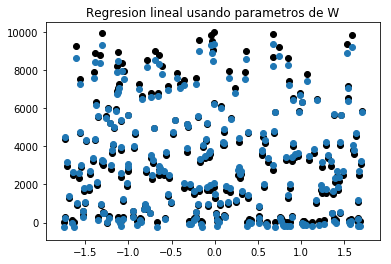

In [5]:
w = LMS(trainxE,trainy,.01,0)
testLMS(testxE,testy,w,-1)

### Validación del modelo eta = 0.01, lambda = 0.01

Coeficientes: 
[[ 2.71504872e+03]
 [ 1.01045004e+03]
 [ 1.57890169e+03]
 [-6.88112661e+01]
 [-3.59619158e+01]
 [-8.20252493e-01]]

 Error medio: 92626.680031

 Ordenada: 2715.048720, Pendiente: 1010.450040


92626.68003097728

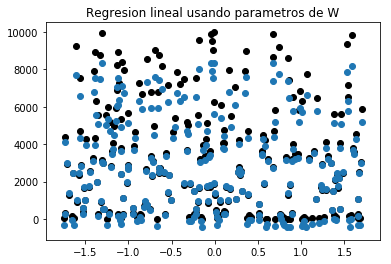

In [6]:
w = LMS(trainxE,trainy,.01,0.001)
testLMS(testxE,testy,w,-1)

### Conclusión: con lambda más grande los coeficientes de algunas variables independientes se hace cada vez más cercano a cero.